In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-03-06 04:25:17--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.07MB/s    in 4m 45s  

2021-03-06 04:30:03 (1.08 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [11]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images/'
datagen = ImageDataGenerator(rescale=1./255)

In [12]:
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_generator = datagen.flow_from_directory(
    directory = base_dir,
    subset='training',
    target_size=(150,150),
    batch_size=3,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    directory = base_dir,
    subset='validation',
    target_size=(150,150),
    batch_size=3,
    class_mode='categorical')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=65,
      validation_data=validation_generator, 
      validation_steps=5, 
      verbose=2)

Epoch 1/65
25/25 - 1s - loss: 1.1266 - accuracy: 0.2667 - val_loss: 1.0899 - val_accuracy: 0.3333
Epoch 2/65
25/25 - 0s - loss: 1.0394 - accuracy: 0.4533 - val_loss: 1.3048 - val_accuracy: 0.4667
Epoch 3/65
25/25 - 0s - loss: 1.0105 - accuracy: 0.5200 - val_loss: 0.9023 - val_accuracy: 0.6667
Epoch 4/65
25/25 - 0s - loss: 1.1324 - accuracy: 0.4400 - val_loss: 1.0951 - val_accuracy: 0.3333
Epoch 5/65
25/25 - 0s - loss: 1.1003 - accuracy: 0.3600 - val_loss: 1.0742 - val_accuracy: 0.4000
Epoch 6/65
25/25 - 0s - loss: 0.9728 - accuracy: 0.4800 - val_loss: 0.4782 - val_accuracy: 0.8667
Epoch 7/65
25/25 - 0s - loss: 0.6715 - accuracy: 0.7733 - val_loss: 0.8439 - val_accuracy: 0.6667
Epoch 8/65
25/25 - 0s - loss: 0.5940 - accuracy: 0.8000 - val_loss: 0.3749 - val_accuracy: 0.8667
Epoch 9/65
25/25 - 0s - loss: 0.4470 - accuracy: 0.8667 - val_loss: 0.1759 - val_accuracy: 0.9333
Epoch 10/65
25/25 - 0s - loss: 0.4070 - accuracy: 0.8800 - val_loss: 0.0779 - val_accuracy: 1.0000
Epoch 11/65
25/25 -

Saving OIP.jpg to OIP (2).jpg
OIP.jpg
paper


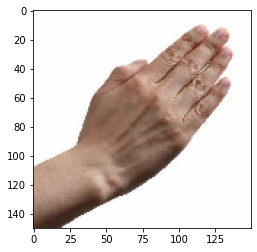

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  hasil = np.argmax(classes)
  
  print(fn)
  if hasil==0:
    print('rock')
  elif hasil==1:
    print('paper')
  else:
    print('scissors')